In [1]:
# Data manipulation
import numpy as np
import pandas as pd



# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score, roc_curve, classification_report, auc
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', 500)

In [2]:
df=pd.read_csv(r"C:\Users\ehina\OneDrive\Desktop\Py-DS-ML-Bootcamp-master\Diabetes\diabetes_binary_health_indicators_BRFSS2015.csv")

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [6]:
for i in df.columns:
    print ('Unique items in',i,'---->',df[i].nunique())

Unique items in Diabetes_binary ----> 2
Unique items in HighBP ----> 2
Unique items in HighChol ----> 2
Unique items in CholCheck ----> 2
Unique items in BMI ----> 84
Unique items in Smoker ----> 2
Unique items in Stroke ----> 2
Unique items in HeartDiseaseorAttack ----> 2
Unique items in PhysActivity ----> 2
Unique items in Fruits ----> 2
Unique items in Veggies ----> 2
Unique items in HvyAlcoholConsump ----> 2
Unique items in AnyHealthcare ----> 2
Unique items in NoDocbcCost ----> 2
Unique items in GenHlth ----> 5
Unique items in MentHlth ----> 31
Unique items in PhysHlth ----> 31
Unique items in DiffWalk ----> 2
Unique items in Sex ----> 2
Unique items in Age ----> 13
Unique items in Education ----> 6
Unique items in Income ----> 8


In [7]:
df=df.astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [9]:
df.shape

(253680, 22)

In [10]:
df.duplicated().sum()

24206

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(229474, 22)

In [13]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

C:\Users\ehina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ehina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


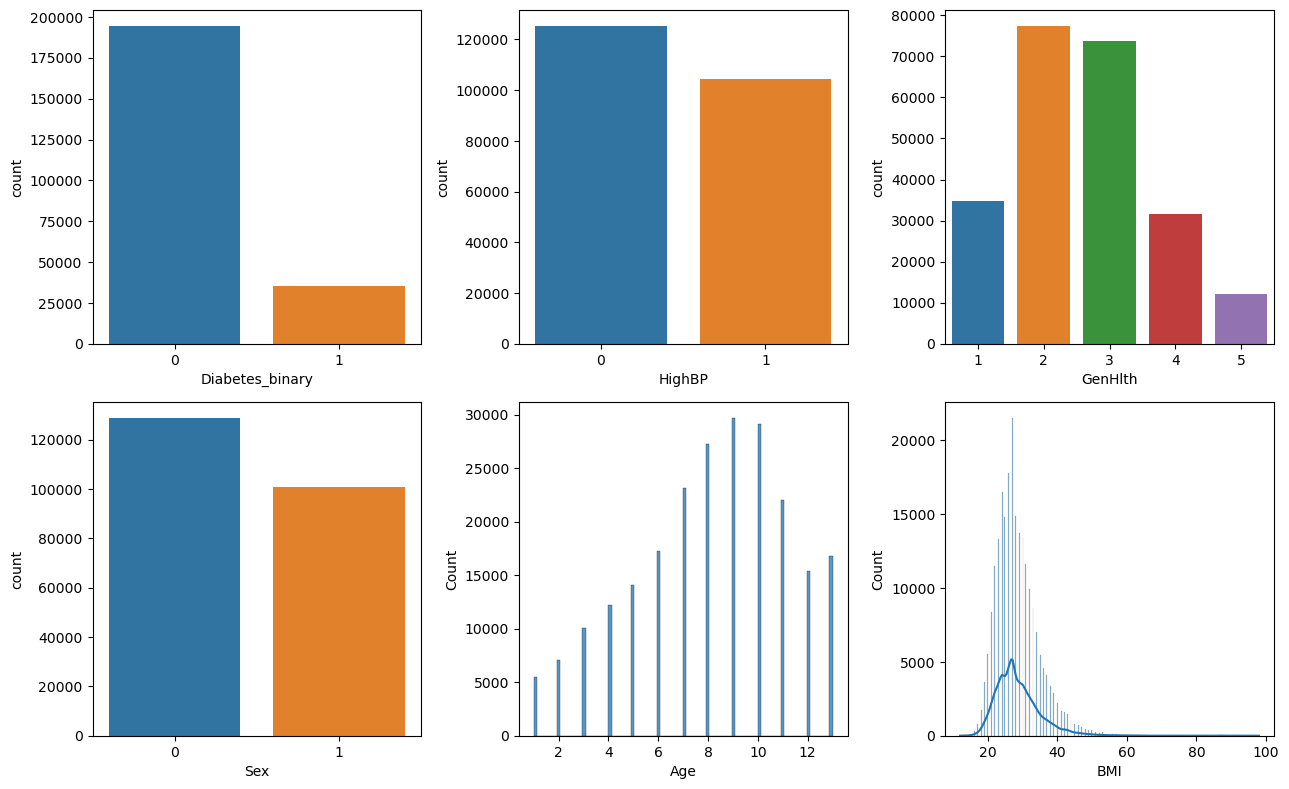

In [14]:
fig,ax= plt.subplots(2,3)
fig.set_figwidth(13)
fig.set_figheight(8)

sns.countplot(data=df,x='Diabetes_binary',ax=ax[0,0])
sns.countplot(data=df,x='HighBP',ax=ax[0,1])
sns.countplot(data=df,x='GenHlth',ax=ax[0,2])
sns.countplot(data=df,x='Sex',ax=ax[1,0])
sns.histplot(data=df,x='Age',ax=ax[1,1])
sns.histplot(data=df,x='BMI',ax=ax[1,2],kde=True)



plt.tight_layout()

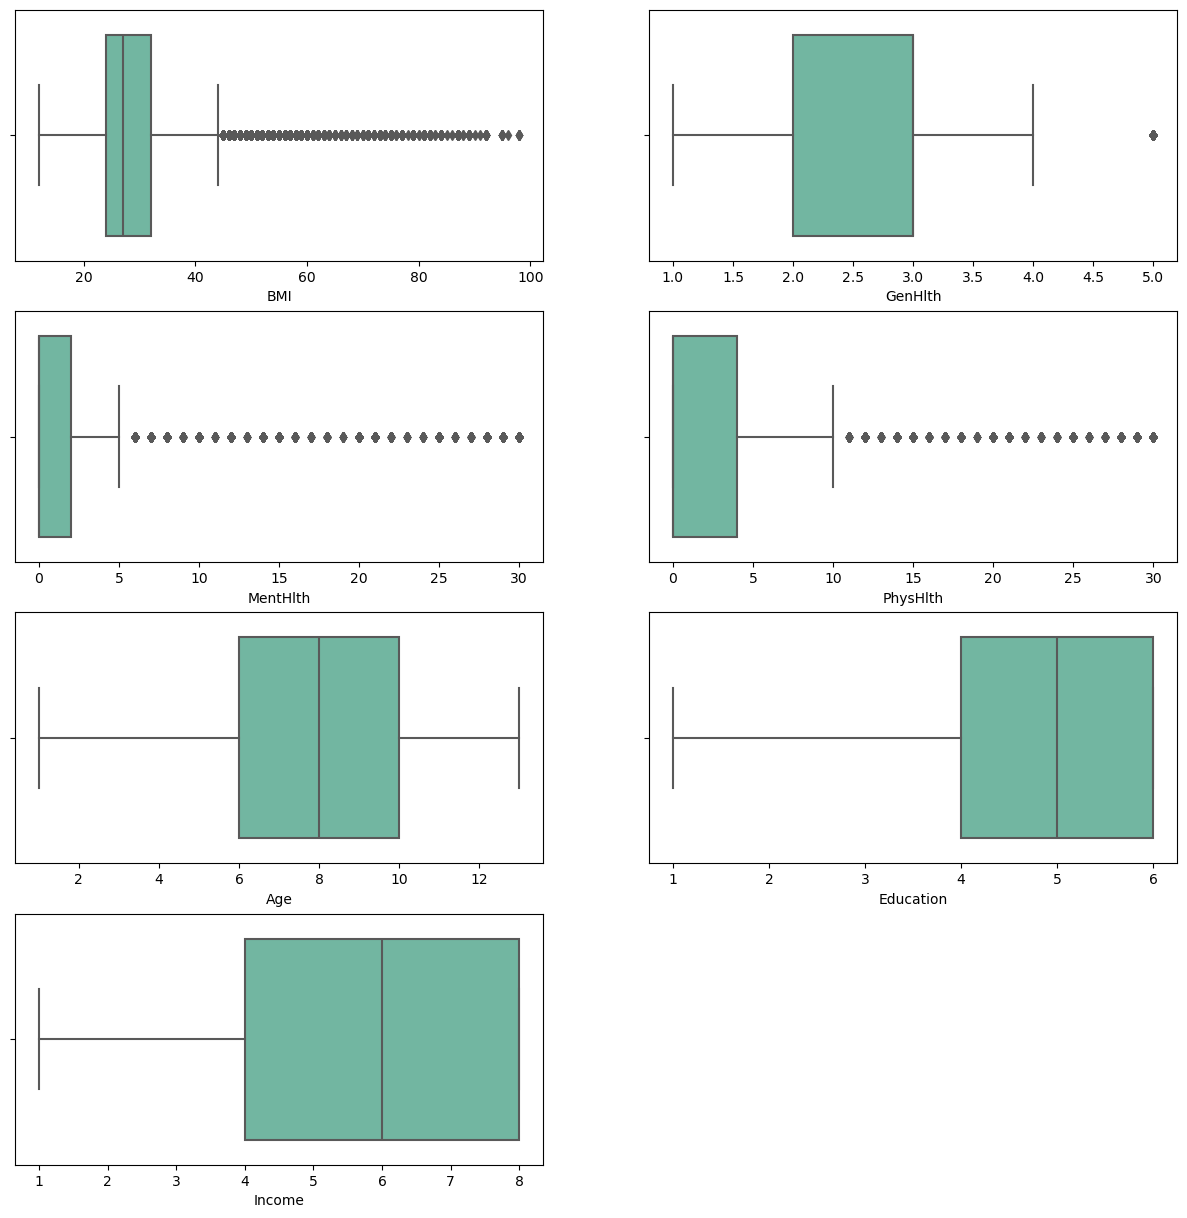

In [15]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

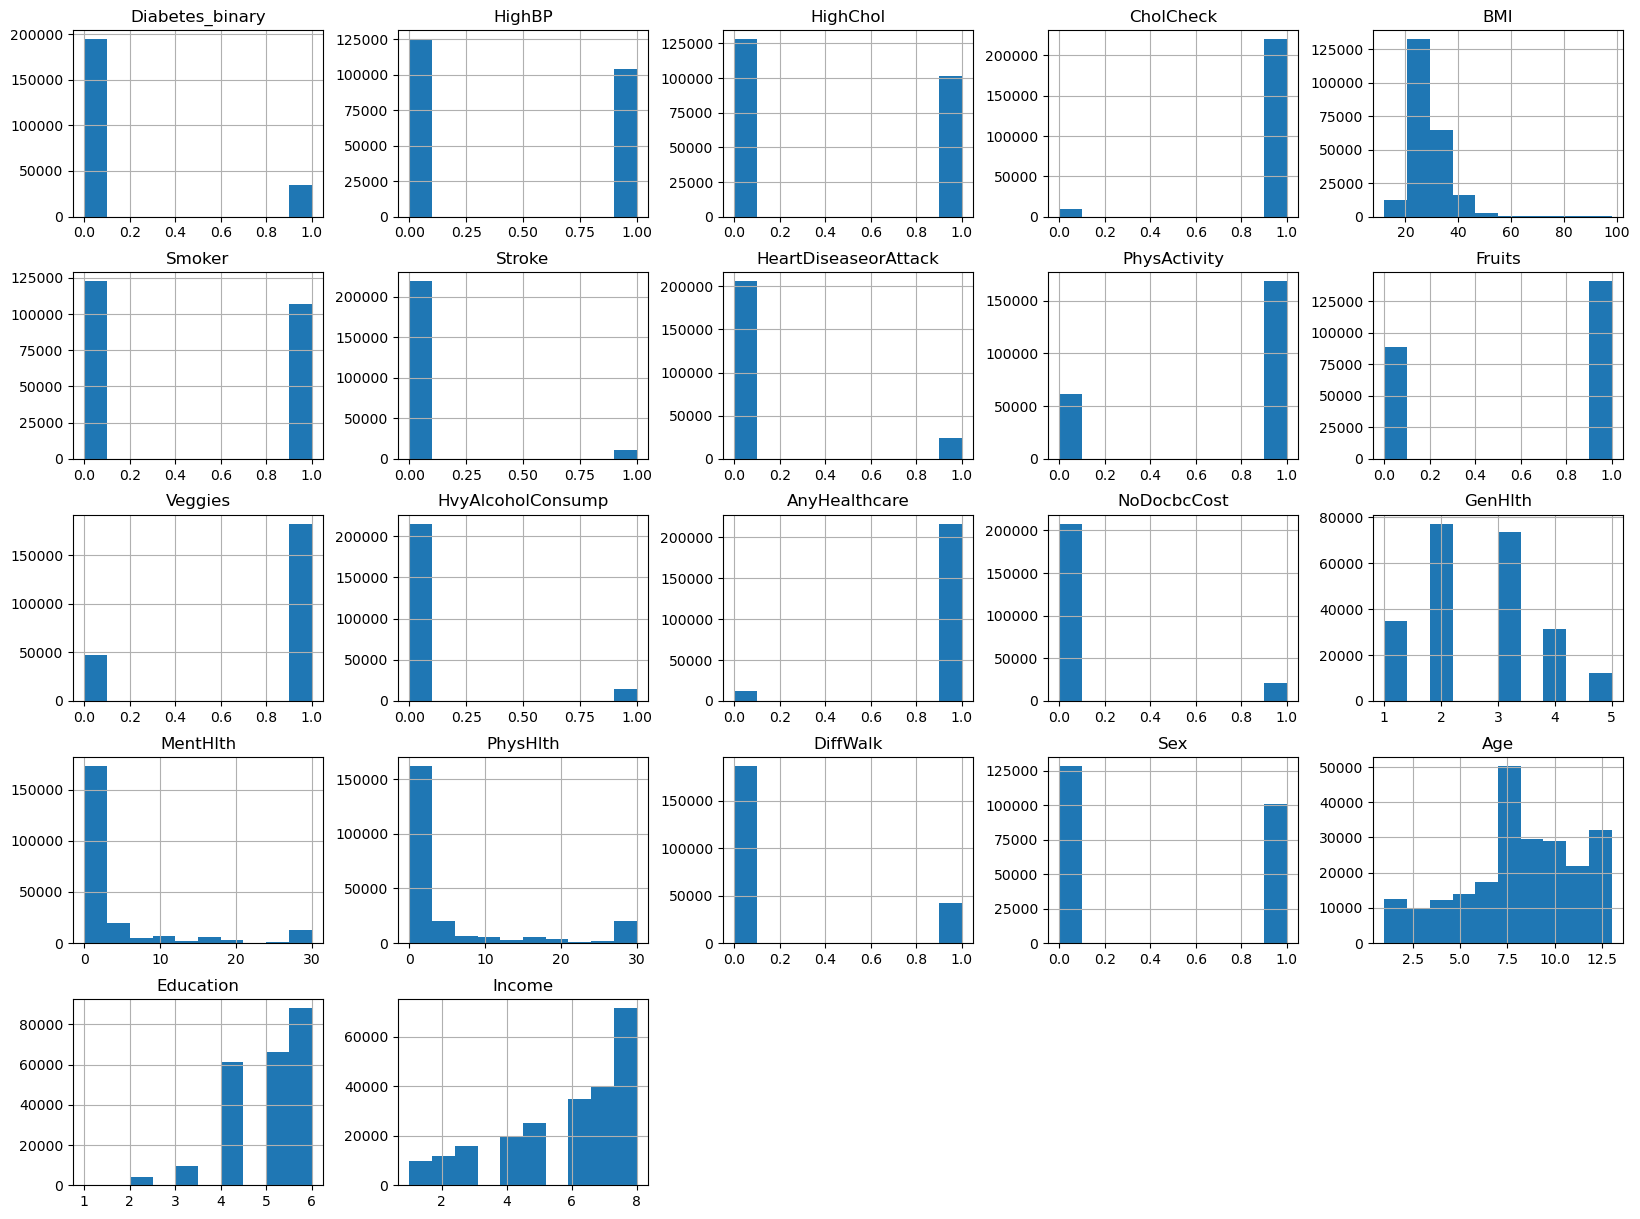

In [16]:
df.hist(figsize=(20,15));

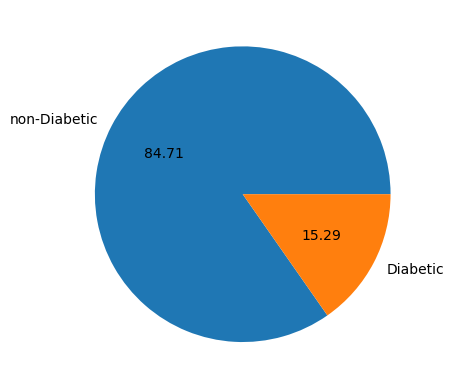

In [17]:
labels=["non-Diabetic","Diabetic"]
plt.pie(df["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

<Axes: >

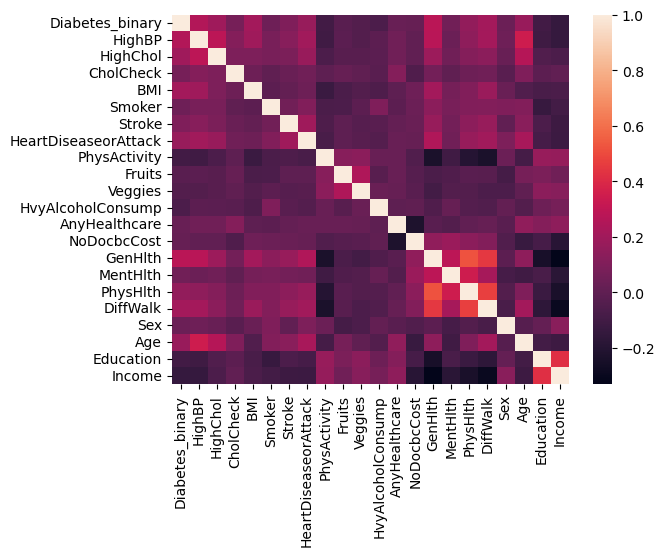

In [18]:
sns.heatmap(df.corr(),)

<Axes: title={'center': 'Diabetes_binary Correlation'}>

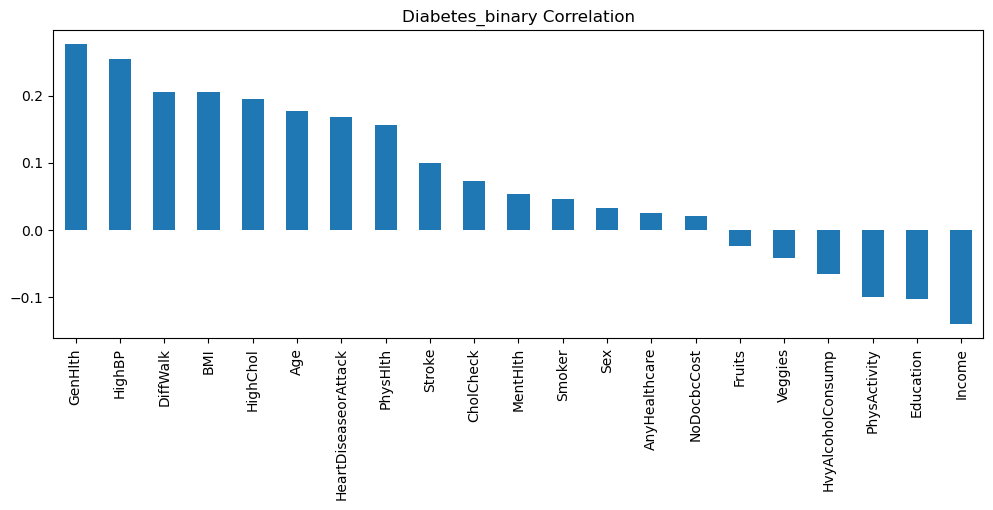

In [19]:
(df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation")
   
   )


In [20]:
X=df.drop('Diabetes_binary', axis=1)
y=df['Diabetes_binary']

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [22]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (183579, 21)
X_test shape: (45895, 21)
y_train shape: (183579,)
y_test shape: (45895,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [24]:

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [25]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
dt.fit(X_train,y_train)

C:\Users\ehina\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [26]:
y_pred = lr.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8502233358753677
Precision: 0.8128729759664486
Recall: 0.8502233358753677
F1 Score: 0.8077648607341021
Confusion Matrix:
 [[38158   718]
 [ 6156   863]]


In [27]:
y_pred = rf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8437084649743981
Precision: 0.8052294081222575
Recall: 0.8437084649743981
F1 Score: 0.8115481998308387
Confusion Matrix:
 [[37520  1356]
 [ 5817  1202]]


In [28]:
y_pred = dt.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.772480662381523
Precision: 0.7844606991696368
Recall: 0.772480662381523
F1 Score: 0.778182933104322
Confusion Matrix:
 [[33189  5687]
 [ 4755  2264]]


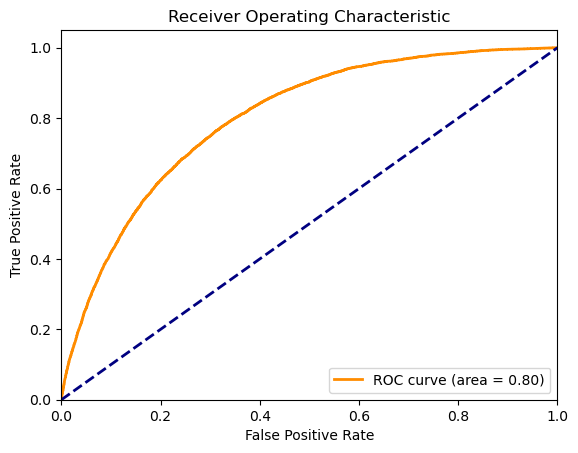

In [29]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)


plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
threshold

array([       inf, 0.92740418, 0.84159852, ..., 0.00453039, 0.00452636,
       0.00320794])

In [31]:
best_threshold = None
best_tp = None
best_tn = None
best_fp = None
best_fn = None
max_net_benefit = float("-inf")

# Iterate through thresholds
for i in threshold:
    # Classify instances based on the threshold
    predicted_labels = (y_pred_proba >= i).astype(int)

    # Calculate TP, TN, FP, FN
    tp = np.sum((predicted_labels == 1) & (y_test == 1))
    tn = np.sum((predicted_labels == 0) & (y_test == 0))
    fp = np.sum((predicted_labels == 1) & (y_test == 0))
    fn = np.sum((predicted_labels == 0) & (y_test == 1))

    net_benefit = (tp * 400) + (tn * 0) + (fp * -200) + (fn * -150)

    if net_benefit > max_net_benefit:
        max_net_benefit = net_benefit
        best_threshold = i
        best_tp = tp
        best_tn = tn
        best_fp = fp
        best_fn = fn
    

In [32]:
print("Best Threshold:", best_threshold)
print("TP:", best_tp)
print("TN:", best_tn)
print("FP:", best_fp)
print("FN:", best_fn)

Best Threshold: 0.25727834912632686
TP: 3777
TN: 33009
FP: 5867
FN: 3242


In [63]:
net_benefit

-4967600

In [65]:
y_test.value_counts()

Diabetes_binary
0    38876
1     7019
Name: count, dtype: int64

In [66]:
confusion_matrix(y_test, y_pred).ravel()

array([33211,  5665,  4779,  2240], dtype=int64)